In [1]:
%matplotlib inline
import numpy as np
import torch

import matplotlib.pyplot as plt

In [14]:
# load base means
base_means_0 = np.load('/home/stanlew/src/splatart/base_means_part_0.npy')
base_means_1 = np.load('/home/stanlew/src/splatart/base_means_part_1.npy')


tgt_means_0 = np.load('/home/stanlew/src/splatart/base_means_part_0.npy')
tgt_means_1 = np.load('/home/stanlew/src/splatart/base_means_part_1.npy')

src_poses_0 = np.load('/home/stanlew/src/splatart/src_poses_ocv_0.npy')
src_poses_1 = np.load('/home/stanlew/src/splatart/src_poses_ocv_1.npy')

tgt_poses_0 = np.load('/home/stanlew/src/splatart/tgt_poses_ocv_0.npy')
tgt_poses_1 = np.load('/home/stanlew/src/splatart/tgt_poses_ocv_1.npy')

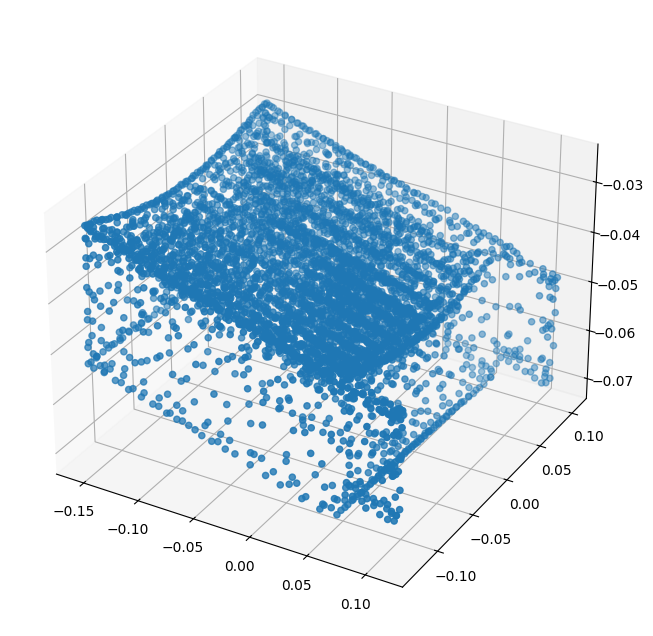

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = base_means_1[:,0]
y = base_means_1[:,1]
z = base_means_1[:,2]
ax.scatter(x, y, z)
plt.show()

In [17]:
inverse_src_poses_0= np.linalg.inv(src_poses_0)
inverse_src_poses_1= np.linalg.inv(src_poses_1)
print(inverse_src_poses_0)
print(inverse_src_poses_1)


[[[ 4.94644433e-01  3.67786109e-01 -7.87439048e-01  2.36231709e+00]
  [ 8.69095504e-01 -2.09324956e-01  4.48169827e-01 -1.34450948e+00]
  [-1.54405289e-08 -9.06044364e-01 -4.23182666e-01  1.26954806e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 4.95090932e-01  3.67786616e-01 -7.87158132e-01  2.36145139e+00]
  [ 8.68840933e-01 -2.10297063e-01  4.48208392e-01 -1.34469855e+00]
  [-6.92047295e-04 -9.05819058e-01 -4.23664182e-01  1.27099192e+00]
  [-1.47548578e-08 -1.09608935e-08  2.34591369e-08  9.99999821e-01]]

 [[ 4.95345473e-01  3.67534012e-01 -7.87115932e-01  2.36131001e+00]
  [ 8.68696094e-01 -2.09834769e-01  4.48705494e-01 -1.34623575e+00]
  [-2.49761739e-04 -9.06028628e-01 -4.23216015e-01  1.26967824e+00]
  [-1.47624455e-08 -1.09533671e-08  2.34578827e-08  9.99999940e-01]]]
[[[ 4.9464443e-01  3.6778611e-01 -7.8743905e-01  2.3623171e+00]
  [ 8.6909550e-01 -2.0932496e-01  4.4816983e-01 -1.3445095e+00]
  [-1.5440529e-08 -9.0604436e-01 -4.2318267e-01  1

In [4]:
pose_tfs = np.load("/home/stanlew/src/splatart/pose_tfs_0_1.npy")
est_poses_rev = np.load("/home/stanlew/src/splatart/revolute_tf_estimates_0_1.npy")
est_poses_prs = np.load("/home/stanlew/src/splatart/prismatic_tf_estimates_0_1.npy")
print(pose_tfs)
print(est_poses_rev)
print(est_poses_prs)

[[[ 1.0000000e+00 -2.9802322e-08  2.9802322e-08  0.0000000e+00]
  [ 2.9802322e-08  9.9999994e-01 -1.4901161e-08  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00]
  [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00]]

 [[ 9.1708642e-01  8.6233672e-03  3.9859501e-01  6.7312717e-03]
  [-9.2420923e-03  9.9995703e-01 -3.6956882e-04  2.6857853e-04]
  [-3.9858130e-01 -3.3449044e-03  9.1712689e-01  1.9549131e-03]
  [-6.3492429e-08  1.8129462e-08  1.2328707e-09  9.9999988e-01]]

 [[ 6.9623441e-01  6.1664688e-03  7.1778798e-01 -2.8641939e-02]
  [-6.0686544e-03  9.9997789e-01 -2.7041035e-03  1.1563301e-05]
  [-7.1778876e-01 -2.4731674e-03  6.9625634e-01  9.8024607e-03]
  [-1.2423175e-08  3.0071217e-08 -6.0718591e-08  1.0000000e+00]]]
[[[ 1.00000000e+00 -3.61447201e-05 -3.19308019e-05  1.07823944e-04]
  [ 3.61424500e-05  1.00000000e+00 -7.11350076e-05 -1.90287356e-05]
  [ 3.19333740e-05  7.11338507e-05  1.00000000e+00  6.15392782e-05]
  [ 0.00000000e+00  0.

In [5]:
# apply each posetf to the base means
base_means_1_tensor = torch.tensor(base_means_1)
pose_tfs_tensor = torch.tensor(pose_tfs).unsqueeze(1)
est_poses_rev_tensor = torch.tensor(est_poses_rev).unsqueeze(1)
est_poses_prs_tensor = torch.tensor(est_poses_prs).unsqueeze(1)
# make base means homogeneous
ones = torch.ones((base_means_1_tensor.shape[0], 1))
base_means_1_homogeneous = torch.cat((base_means_1_tensor, ones), dim=1).unsqueeze(-1).unsqueeze(0) # N, 4, 1


In [6]:
base_means_1_homogeneous.shape

torch.Size([1, 4801, 4, 1])

In [7]:
pose_tfs_tensor.shape

torch.Size([3, 1, 4, 4])

In [20]:
transformed_means = (pose_tfs_tensor @ base_means_1_homogeneous)
rev_transformed_means = (est_poses_rev_tensor @ base_means_1_homogeneous)
prs_transformed_means = (est_poses_prs_tensor @ base_means_1_homogeneous[0:2])
transformed_means.shape

torch.Size([3, 4801, 4, 1])

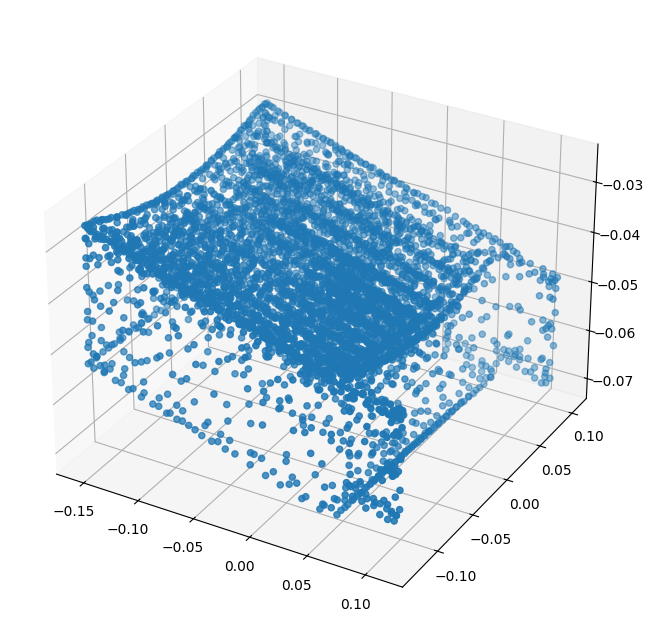

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = transformed_means[0,:,0]
y = transformed_means[0,:,1]
z = transformed_means[0,:,2]
ax.scatter(x, y, z)
plt.show()

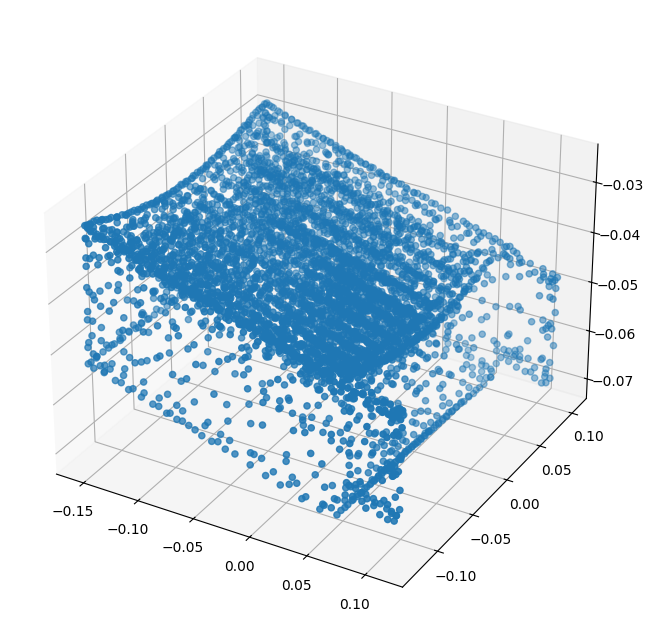

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = rev_transformed_means[0,:,0]
y = rev_transformed_means[0,:,1]
z = rev_transformed_means[0,:,2]
ax.scatter(x, y, z)
plt.show()

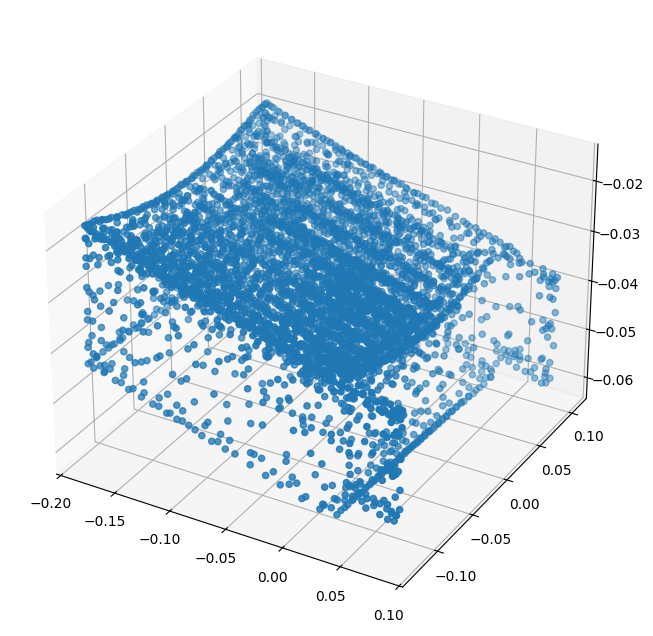

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = prs_transformed_means[0,:,0]
y = prs_transformed_means[0,:,1]
z = prs_transformed_means[0,:,2]
ax.scatter(x, y, z)
plt.show()

In [33]:
torch.sum(torch.abs(transformed_means - rev_transformed_means)) / transformed_means.shape[1] # average error

tensor(0.0477)

In [51]:
def points_err(points_a, points_b):
    pts_delta = points_a - points_b
    print(pts_delta.shape)
    pts_sq_delta = pts_delta ** 2
    return torch.sqrt(torch.sum(pts_sq_delta, dim=-1))

In [52]:
transformed_means.shape

torch.Size([3, 4801, 4, 1])

In [57]:
points_err(transformed_means[:,:,0:3,0], rev_transformed_means[:,:,0:3,0]).mean() # average error

torch.Size([3, 4801, 3])


tensor(0.0125)

In [58]:
points_err(transformed_means[0:2,:,0:3,0], prs_transformed_means[:,:,0:3,0]).mean() # average error

torch.Size([2, 4801, 3])


tensor(0.0168)

In [32]:
# get the normed mean error between rev_transformed_means and transformed_means
normed_means = torch.linalg.vector_norm(torch.abs(transformed_means - rev_transformed_means))
print(normed_means)
print(transformed_means.shape)
normed_means = normed_means / transformed_means.shape[1]
print(normed_means) # mean error per point

tensor(2.1571)
torch.Size([3, 4801, 4, 1])
tensor(0.0004)


In [37]:

rev_transformed_means.shape

torch.Size([3, 4801, 4, 1])

In [34]:
torch.sum(torch.abs(transformed_means[0:2] - prs_transformed_means)) / transformed_means[0:2].shape[1] # average error

tensor(0.0458)

In [27]:
# get the normed mean error between rev_transformed_means and transformed_means
normed_means = torch.norm(transformed_means[0:2] - prs_transformed_means)
print(normed_means)
print(transformed_means.shape)
normed_means = normed_means / transformed_means[0:2].shape[1]
print(normed_means) # mean error per point

tensor(2.5583)
torch.Size([3, 4801, 4, 1])
tensor(0.0005)


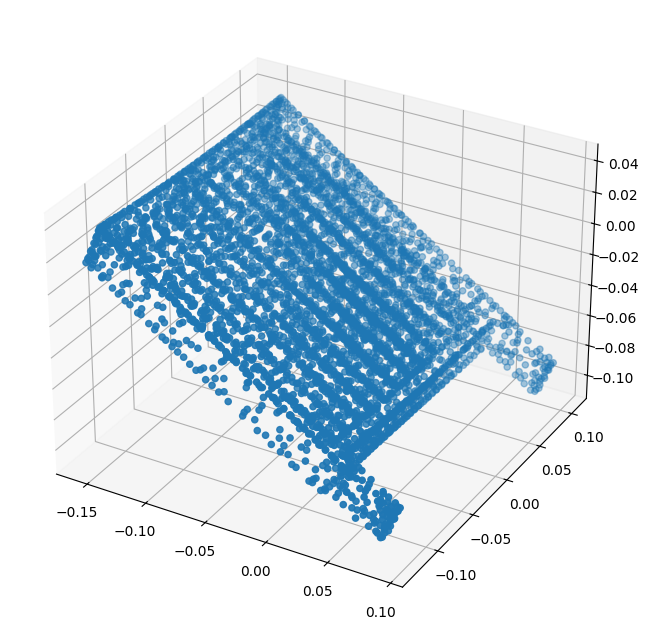

In [10]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = transformed_means[1,:,0]
y = transformed_means[1,:,1]
z = transformed_means[1,:,2]
ax.scatter(x, y, z)
plt.show()

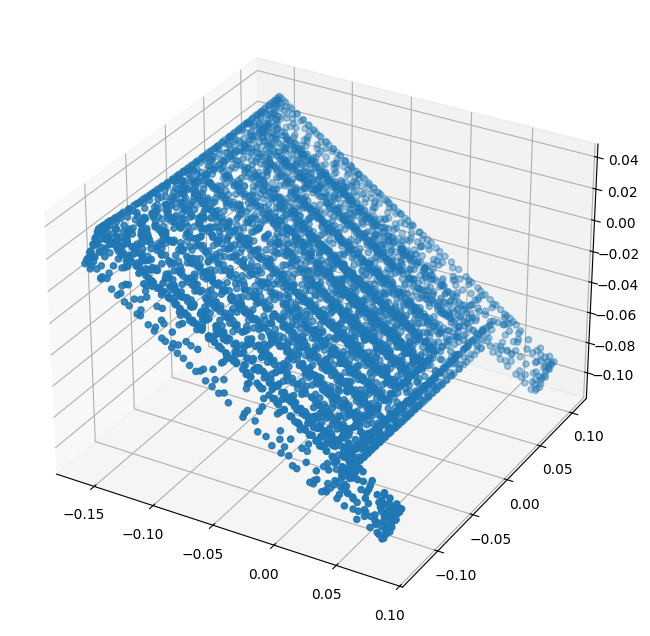

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = rev_transformed_means[1,:,0]
y = rev_transformed_means[1,:,1]
z = rev_transformed_means[1,:,2]
ax.scatter(x, y, z)
plt.show()

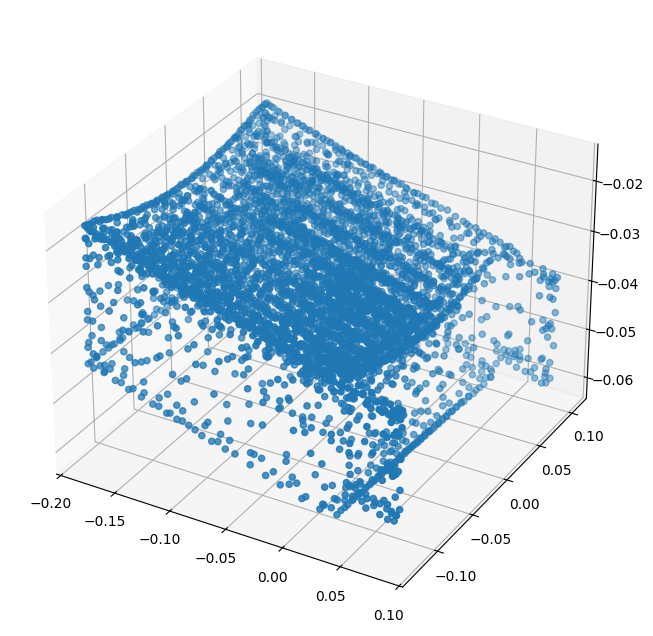

In [25]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = prs_transformed_means[1,:,0]
y = prs_transformed_means[1,:,1]
z = prs_transformed_means[1,:,2]
ax.scatter(x, y, z)
plt.show()

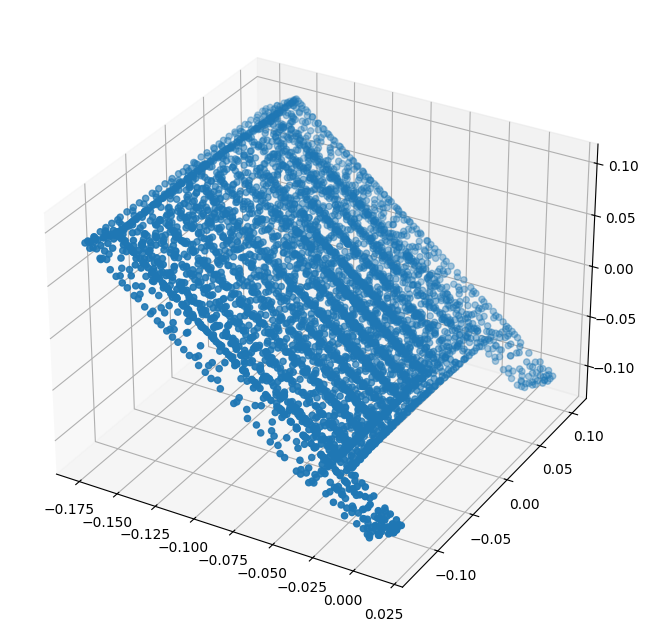

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = transformed_means[2,:,0]
y = transformed_means[2,:,1]
z = transformed_means[2,:,2]
ax.scatter(x, y, z)
plt.show()